In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pysis import CubeFile
import os
import cv2
from tqdm import tqdm
import math

In [86]:
jiram_dat = pd.read_csv('./data_readable/Spectra_Europa_JM0171_4Guni_csv.csv')
jiram_dat.dropna(inplace = True, axis=0)
# jiram_dat = jiram_dat.convert_dtypes(convert_floating=True)
jiram_dat

,filename,sample #,long,lat,incidence,emission,phase,time,0,1,...,326,327,328,329,330,331,332,333,334,335
0,JIR_SPE_RDR_2018355T085517_V01,78,277.143,12.7628,63.3991,77.8565,90.8545,7.8853,0.8071455,0.025590,...,0.2570465,0.4547307,0.3854276,0.4464184,0.3845086,0.3214088,0.3302018,0.000000,0.297816,0.470634
1,JIR_SPE_RDR_2018355T085517_V01,79,275.431,16.1382,65.6655,74.5743,90.8409,7.7711,0.2270164,0.000000,...,0.3881184,0.2887772,0.3912258,0.2481662,0.0497207,0.1551568,0,0.000000,1.175900,0.000000
2,JIR_SPE_RDR_2018355T085517_V01,80,273.623,18.7420,67.8778,72.0687,90.8273,7.6506,0.0707885,0.035021,...,0.5190761,0.3893622,0.3610165,0.1319802,0.112627,0.094077,0.2280545,0.000000,0.496937,0.420063
3,JIR_SPE_RDR_2018355T085517_V01,81,271.735,20.8583,70.0470,70.0547,90.8138,7.5247,0.4044245,0.083216,...,0.139314,0.3446912,0.3247157,0.3791509,0.4514597,0.4055248,0.3524789,0.424566,0.000000,0.757216
4,JIR_SPE_RDR_2018355T085517_V01,82,269.778,22.6158,72.1803,68.4027,90.8002,7.3942,0.5244192,0.099306,...,0.1934924,0.3038488,0.3437892,0.3199416,0.4919282,0.7233066,0.7704375,1.665657,0.811408,0.494694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,JIR_SPE_RDR_2018355T090755_V01,251,18.355,22.6581,47.3234,60.2636,88.6963,14.6919,0.2377009,0.442463,...,0,0,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,0.114481,0.000000,0.000000
211,JIR_SPE_RDR_2018355T090755_V01,252,19.741,25.7381,49.9259,57.1438,88.6827,14.7844,0,0.026768,...,0.268573,0.0875714,0,0.0121974,0.1315218,0,0,0.230796,0.000000,0.507303
212,JIR_SPE_RDR_2018355T090755_V01,253,21.192,28.5250,52.4399,54.3227,88.6692,14.8811,1.0749126,0.000000,...,0.0817712,0.0852066,0,0,0,0,0.1354304,0.000000,0.000000,1.395839
213,JIR_SPE_RDR_2018355T090755_V01,254,22.713,31.0790,54.8774,51.7406,88.6556,14.9825,0.4146981,0.000000,...,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,0.000000,1.432747,1.845352


In [87]:
jiram_dat.isna().any(axis=None)

False

In [88]:
jiram_spec = jiram_dat.iloc[:,8:]
jiram_spec.replace('#NAME?', math.nan, inplace=True)
jiram_spec

,0,1,2,3,4,5,6,7,8,9,...,326,327,328,329,330,331,332,333,334,335
0,0.8071455,0.025590,0.129267,0.1755944,0.0703638,0.0693348,0.0560083,0.0448043,0.0459499,0.043548,...,0.2570465,0.4547307,0.3854276,0.4464184,0.3845086,0.3214088,0.3302018,0.000000,0.297816,0.470634
1,0.2270164,0.000000,0.057209,0.0869917,0.0655855,0.0859674,0.0906699,0.0827746,0.0793529,0.0815082,...,0.3881184,0.2887772,0.3912258,0.2481662,0.0497207,0.1551568,0,0.000000,1.175900,0.000000
2,0.0707885,0.035021,0.205408,0.1173817,0.1170666,0.1167225,0.098005,0.0832016,0.0834333,0.0742909,...,0.5190761,0.3893622,0.3610165,0.1319802,0.112627,0.094077,0.2280545,0.000000,0.496937,0.420063
3,0.4044245,0.083216,0.021993,0.1127712,0.0590577,0.0549797,0.0496964,0.0550414,0.064258,0.0520797,...,0.139314,0.3446912,0.3247157,0.3791509,0.4514597,0.4055248,0.3524789,0.424566,0.000000,0.757216
4,0.5244192,0.099306,0.049219,0.1269686,0.0576693,0.0560912,0.0588061,0.0565899,0.0672221,0.0670138,...,0.1934924,0.3038488,0.3437892,0.3199416,0.4919282,0.7233066,0.7704375,1.665657,0.811408,0.494694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0.2377009,0.442463,0.073925,0.1579427,0.1356582,0.0916079,0.0900045,0.0937854,0.0952404,0.0976556,...,0,0,NaN,NaN,NaN,NaN,NaN,0.114481,0.000000,0.000000
211,0,0.026768,0.306861,0.0825856,0.1211289,0.1322222,0.1023565,0.1054526,0.084996,0.0803699,...,0.268573,0.0875714,0,0.0121974,0.1315218,0,0,0.230796,0.000000,0.507303
212,1.0749126,0.000000,0.050979,0.2107315,0.0713627,0.0907782,0.096341,0.0859188,0.0927831,0.0816015,...,0.0817712,0.0852066,0,0,0,0,0.1354304,0.000000,0.000000,1.395839
213,0.4146981,0.000000,0.105089,0.1412714,0.093387,0.1117241,0.1074675,0.0915045,0.1192215,0.1093921,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.432747,1.845352


In [89]:
calib = pd.read_table('JIRAM_wl.txt', sep=' ')
calib.dropna(inplace=True, axis=1)
calib

,banda,lambda,FWHM
0,1,2002.27,9.98963
1,2,2011.26,10.04900
2,3,2020.25,10.10710
3,4,2029.24,10.16410
4,5,2038.23,10.21990
...,...,...,...
331,332,4978.23,13.36160
332,333,4987.22,13.34710
333,334,4996.21,13.33180
334,335,5005.20,13.31590


Spectra_Europa_JM0081_4Guni_csv.csv   337
Spectra_Europa_JM0091_4Guni_csv.csv   97
Spectra_Europa_JM0111_4Guni_csv.csv   321
Spectra_Europa_JM0181_4Guni_csv.csv   153


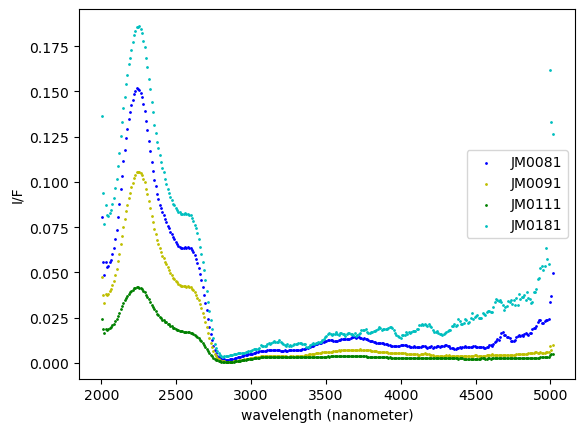

In [90]:
color = ['b','y','g','r','c']
for index, name in enumerate(os.listdir('C:/Users/WS6/Desktop/Nishant/juno_received/data_readable/')):
    if '171' in name:
        continue
    jiram_dat = pd.read_csv('./data_readable/'+name)
    jiram_dat.dropna(inplace = True, axis=0)
    
    jiram_spec = jiram_dat.iloc[:,8:]
    jiram_spec.replace('#NAME?', math.nan, inplace=True)
    
    pixels = np.array(jiram_spec.iloc[:,0], dtype=np.float64).size
    bands = 336
    
    
    print(name, ' ', pixels)
    
    total = np.zeros(bands)
    pixelsTotal = 0

    wavelengths = np.array(calib.iloc[:,1], dtype=np.float64)

    for i in range(pixels):

    #     print(i)
        spec = np.array(jiram_spec.iloc[i,:], dtype=np.float64)

        if np.all(np.isfinite(spec)):

            total += spec
            pixelsTotal += 1

#     print(pixelsTotal)

    total /= pixelsTotal
    
    label = name.replace('Spectra_Europa_','').replace('_4Guni_csv.csv','')
    plt.scatter(wavelengths, total, c=color[index], s=1, label=label)
    plt.legend()
    plt.xlabel('wavelength (nanometer)')
    plt.ylabel('I/F')
   
plt.savefig("jiram.png")
plt.show()
    
    


In [168]:
geometry_df = pd.DataFrame()
band = 20

for index, name in enumerate(os.listdir('C:/Users/WS6/Desktop/Nishant/juno_received/data_readable/')):
#     if '171' in name:
#         continue
    jiram_dat = pd.read_csv('./data_readable/'+name)
    jiram_dat.dropna(inplace = True, axis=0)
    
    photo = jiram_dat.iloc[:,4:7]
    photo.replace('#NAME?', math.nan, inplace=True)
    
    radiance = jiram_dat.iloc[:,band]
    radiance.replace('#NAME?', math.nan, inplace=True)

    photo = pd.concat([photo, radiance], axis=1)
    
    geometry_df = pd.concat([geometry_df, photo], ignore_index=True)
    
geometry_df

,incidence,emission,phase,12
0,28.5902,73.4916,91.5397,0.1270094
1,34.0828,73.7680,91.6407,0.1355803
2,39.7696,65.3133,91.6272,0.1598707
3,44.7456,59.0558,91.6137,0.1350934
4,49.2713,53.8461,91.6002,0.1222687
...,...,...,...,...
1118,65.5485,17.3927,82.7912,0.0817965
1119,68.6047,14.3011,82.7776,0.0573848
1120,71.6196,11.2524,82.7641,0.059353
1121,74.6029,8.2368,82.7505,0.0467214


In [169]:
geometry_df.dropna(inplace=True)
geometry_df.reset_index(drop=True)

,incidence,emission,phase,12
0,28.5902,73.4916,91.5397,0.1270094
1,34.0828,73.7680,91.6407,0.1355803
2,39.7696,65.3133,91.6272,0.1598707
3,44.7456,59.0558,91.6137,0.1350934
4,49.2713,53.8461,91.6002,0.1222687
...,...,...,...,...
1105,65.5485,17.3927,82.7912,0.0817965
1106,68.6047,14.3011,82.7776,0.0573848
1107,71.6196,11.2524,82.7641,0.059353
1108,74.6029,8.2368,82.7505,0.0467214


In [170]:
geometry_df.isna().sum().sum()

0

In [171]:
inAngles = np.array(geometry_df['incidence '], dtype=np.float64)
phAngles = np.array(geometry_df['phase'], dtype=np.float64)
emAngles = np.array(geometry_df['emission'], dtype=np.float64)
spectra = np.array(geometry_df.iloc[:,3], dtype=np.float64)

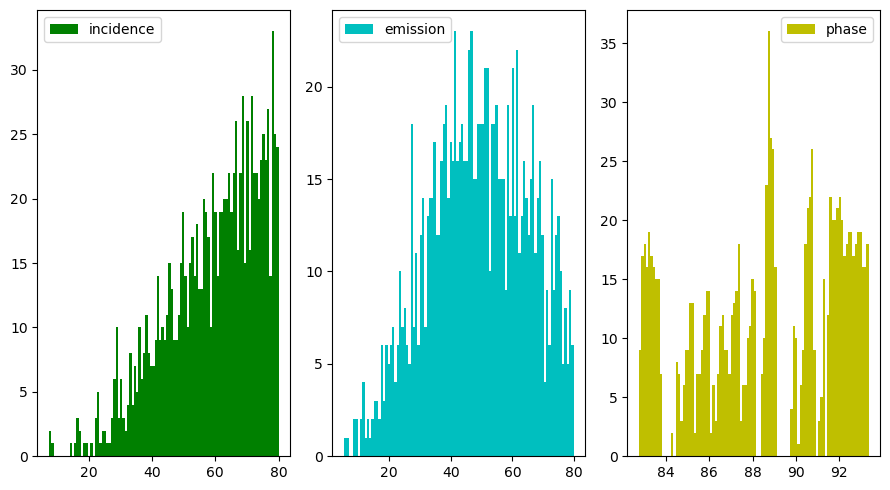

In [172]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9,5))
ax1.hist(inAngles, bins = 100, label = 'incidence', color='g')
ax1.legend()
ax2.hist(emAngles, bins = 100, label = 'emission', color='c')
ax2.legend()
ax3.hist(phAngles, bins = 100, label = 'phase', color='y')
ax3.legend()
plt.tight_layout()
plt.show()

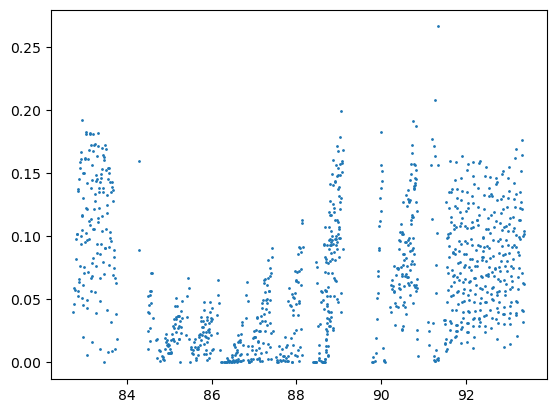

In [173]:
plt.scatter(phAngles, spectra, s=1)
plt.show()

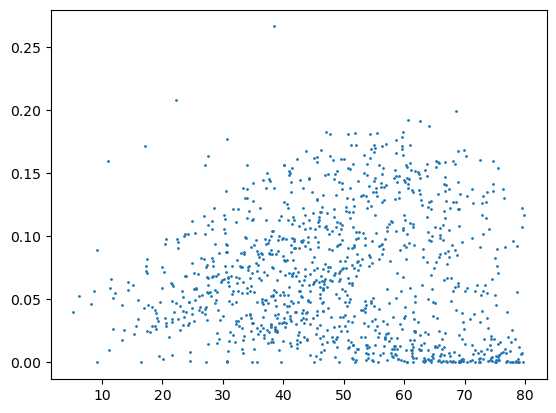

In [174]:
plt.scatter(emAngles, spectra, s=1)
plt.show()

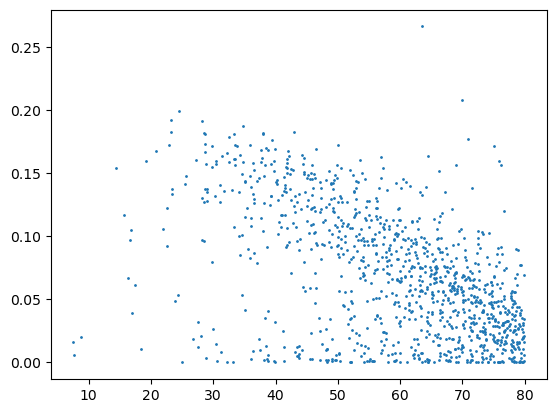

In [175]:
plt.scatter(inAngles, spectra, s=1)
plt.show()

[0.668, 1.0]


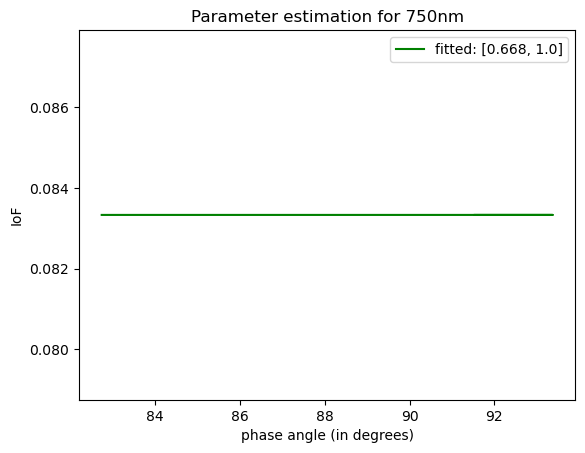

In [176]:
import sys
import os
import math
import time
import statistics
import pandas as pd
import numpy as np
from scipy import constants
import seaborn as sb
# import loader as ld
import matplotlib.pyplot as plt
from spectral import *
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit
from pysis import CubeFile


###########################################################
def diffRef(w):
	num = 1-np.sqrt(1-w)
	denom = 1+np.sqrt(1-w)
	diffr = num/denom
	return diffr

def chandra(x,w):
	ch = (1-w*x*(diffRef(w)+(1-2*diffRef(w)*x)*np.log(1+1/x)/2))**-1
	return ch

def imsa(w,i,e):
	first = chandra(np.cos(np.deg2rad(i)),w)
	second = chandra(np.cos(np.deg2rad(e)),w)
	im = first*second -1
	return im

def hapke(angles,w,b):

	Bo, hs = 1.76,0.06
	g,i,e = angles

	#lommel-selliger
	num = np.cos(np.deg2rad(i))
	denom = np.cos(np.deg2rad(e)) + num
	ls = num/denom

	#hen-gre
	c = 3.29*math.exp(-17.4*b**2) - 0.908
	first = (1+c)*(1-b**2)/(2*(1-2*b*np.cos(np.deg2rad(g))+b**2)**1.5)
	second = (1-c)*(1-b**2)/(2*(1+2*b*np.cos(np.deg2rad(g))+b**2)**1.5)
	hen = (first + second)

	#multiple scattering
	msa = imsa(w,i,e)

	hap = w*ls*(hen+msa)/4

	return hap

#############################################################


limit = ((0,0.3),(0.7,1))
popt,pcov = curve_fit(hapke,(phAngles,emAngles,inAngles),spectra,bounds=limit)

params = [round(x,3) for x in popt]
print(params)

fitted = []
for i in range(len(phAngles)):
	fit_value = hapke((phAngles[i],0,30),popt[0],popt[1])
	fitted.append(fit_value)

plt.plot(phAngles, fitted, color='green', label='fitted: {}'.format(params))

plt.title('Parameter estimation for 750nm')
plt.xlabel('phase angle (in degrees)')
plt.ylabel('IoF')
plt.legend()
plt.savefig('2param_fit.png')

plt.show()


In [177]:
A = np.array(fitted)
A.shape

(1110,)

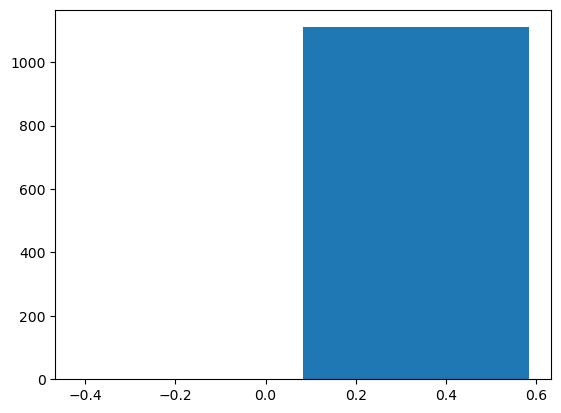

In [179]:
plt.hist(A, bins = 2)
plt.show()